# STAT 207 Lab 10 - Group Part - [5 total points]

## Sampling Distributions of Sample Slopes

Due: Tuesday, November 1, 11:59pm CST

## <u>Part 1</u>: [1 pt] Guess the Correlation Game

As a team, play the game on this website (http://guessthecorrelation.com/) and get at least 20 coins (as shown below). The point of the game is to accurately guess the correlation coefficients $R$ of the scatterplots that they show you. Once you have earned 20 coins, take a screencap of the screen and save it as an image in the folder that this ipynb file is saved in (ie. the one that you will push to your Github repository.)


![title](game_image.png)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy import stats
from scipy.stats import t

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns; sns.set()


import math

## <u>Case Studies</u>: U.S. County Poverty Rate and Unemployment Rate
In this lab we will explore the statistical concepts that we've learned this week while also examining the **unemployment rates** and the **poverty rates** of the counties in the U.S.



### 2.1. [0.25 pt] Data Processing and Cleaning


1. Read the county.csv into a dataframe, call it df, and display the first five rows.
 - *This dataset has missing values! Specifically, the phrase 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.*
2. Create a pandas dataframe that is comprised of just the poverty rate and the unemployment_rate columns. Then drop all rows in this dataframe that have missing values.



In [31]:
df = pd.read_csv(('county.csv'),na_values = ['data unavailable'])
df.dropna()
df

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,Wyoming,37613.0,43806,43534.0,-3.57,12.0,73.7,14.6,4.55,no,some_college,30282.59,71083.0,none
3138,Teton County,Wyoming,18251.0,21294,23265.0,4.21,6.8,60.8,31.9,2.99,no,bachelors,48557.37,80049.0,partial
3139,Uinta County,Wyoming,19742.0,21118,20495.0,-2.22,14.9,73.7,17.0,4.50,no,some_college,27048.12,54672.0,none
3140,Washakie County,Wyoming,8289.0,8533,8064.0,-4.31,12.8,70.9,10.0,4.08,no,some_college,27494.83,51362.0,none


### 2.2. Population Relationship between Unemployment Rate and Poverty Rate

Next we would like to examine the relationship between unemployment rate and the poverty rate of all U.S. counties.

#### 2.2.1. [0.5 pt] Visualization

Plot a scatterplot visualizing the relationship between the unemployment rate and poverty rate of all U.S. counties.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Relationship between unemployment and poverty rates')

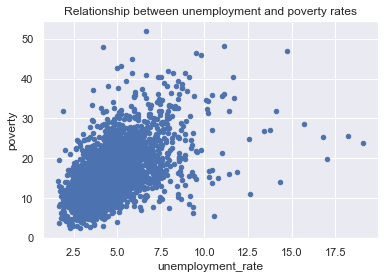

In [34]:
df.plot.scatter(x = 'unemployment_rate', y = 'poverty')
plt.title("Relationship between unemployment and poverty rates")

#### 2.2.2. [.75 pt] Simple Linear Regression Line

Fit an ordinary least squares regression line for this population of data that predicts the poverty rate of a county given the unemployment rate of the county. Write out this simple linear regression equation below. Make sure to use the correct notation discussed in class.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


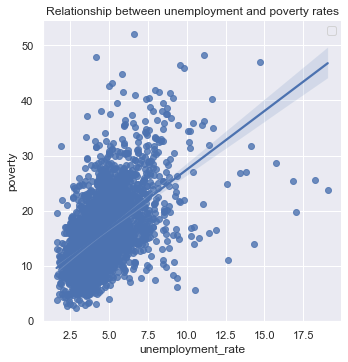

In [39]:
sns.lmplot(x = 'unemployment_rate', y = 'poverty' ,data = df)
plt.title('Relationship between unemployment and poverty rates')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [49]:
results = smf.ols("poverty ~ unemployment_rate", data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1284.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          4.79e-236
Time:                        18:16:07   Log-Likelihood:                -9798.5
No. Observations:                3139   AIC:                         1.960e+04
Df Residuals:                    3137   BIC:                         1.961e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.1472      0.291     21.117      0.000       5.576       6.718
unemployment_rate     2.1301      0.059     35.835      0.000       2.014       2.247
==============================================================================
Omnibus:                      348.692   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              884.345
Skew:                           0.632   Prob(JB):                    9.26e-193
Kurtosis:                       5.272   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

poverty_rate_hat = 6.1472 + 2.1301[unemployment_rate] 

### 2.3. *Actual* Sampling Distribution of Sample Slopes

#### 2.3.1. [1.25 pt] Creating an *Actual* Sampling Distribution

Below, you should create a sampling distribution of sample slopes with the following specifications.
1. Each of your random samples from the population of U.S. counties should be of size 40.
2. Your simple linear regression lines that you fit to each random sample should predict the poverty rate of a county, given it's unemployment rate.
3. Your sampling distribution should be comprised of 500 sample slopes from each of these 500 simple linear regression lines.
4. Put your sampling distribution in a dataframe.

<u>Hint</u>: You may find the **.params** attribute which extracts the intercept and slope values from a resulting linear regression line useful.

In [50]:
import pandas as pd
import statsmodels.formula.api as smf
tmp = pd.DataFrame({'x': [1,2,3,4,2,3,4,4], 'y': [3,2,7,8,6,7,9,6]})
tmp

,x,y
0,1,3
1,2,2
2,3,7
3,4,8
4,2,6
5,3,7
6,4,9
7,4,6


In [51]:
tmp_results = smf.ols('y ~ x', data=tmp).fit()
tmp_results.summary()

/Users/elizabethbinkina/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     10.38
Date:                Tue, 01 Nov 2022   Prob (F-statistic):             0.0181
Time:                        18:16:07   Log-Likelihood:                -13.771
No. Observations:                   8   AIC:                             31.54
Df Residuals:                       6   BIC:                             31.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1408      1.606      0.710      0.504      -2.789       5.070
x              1.6901      0.524      3.223      0.018       0.407       2.973
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.207
Skew:                          -0.875   Prob(JB):                        0.547
Kurtosis:                       2.255   Cond. No.                         9.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
tmp_results.params

Intercept    1.140845
x            1.690141
dtype: float64

In [53]:
print(tmp_results.params[0])
print(tmp_results.params[1])

1.1408450704225401
1.69014084507042


In [62]:
def create_random_sample(df, n=1, M = 1, random_state = 2345456111):
    sample_slopes= []
    
    for i in range(M):
        r = df['unemployment_rate'].sample(n, replace=False)
        rand_sample = pd.DataFrame({'unemployment_rate' : r})
        
        result = smf.ols('Poverty ~ unemployment_rate', data=tmp).fit()
       
        df_sample_resuling_slopes = pd.DataFrame({'Equations': result})
        
    return df_sample_resuling_slopes

In [64]:
my_actual_sample_prop = create_random_sample(df, n = 80, M=1000,random_state = 2345456111)
my_actual_sample_prop

PatsyError: Error evaluating factor: NameError: name 'unemployment_rate' is not defined
    Poverty ~ unemployment_rate
              ^^^^^^^^^^^^^^^^^

#### 2.3.2. [0.5 pt] Sampling Distribution Mean and Standard Deviation

Calculate the mean and the standard deviation of the *actual* sampling distribution that you created in 2.3.1.

### 2.4. *Theoretical* Sampling Distribution of Sample Slopes

#### 2.4.1. [0.5 pt] [ *Theoretical* Mean of the Sampling Distribution of Sample Slopes

What is the mean of the corresponding *theoretical* sampling distribution of sample slopes? (Or in other words, if we had *theoretically* created the sampling distribution above and had it include infinitely many sample slopes, what would we *expect* the mean of this sampling distribution to be?)

#### 2.4.2. [0.25 pt] Difference

How close is the mean of the *theoretical* sampling distribution that you calculated in 2.4.1 and the mean of the *actual* sampling distribution that you calculated in 2.3.2?

### <u>Contribution Report</u>: